<a href="https://colab.research.google.com/github/Frozen-fire2001/bus_reservation/blob/main/SCL_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Convex Hull using Graham Scan

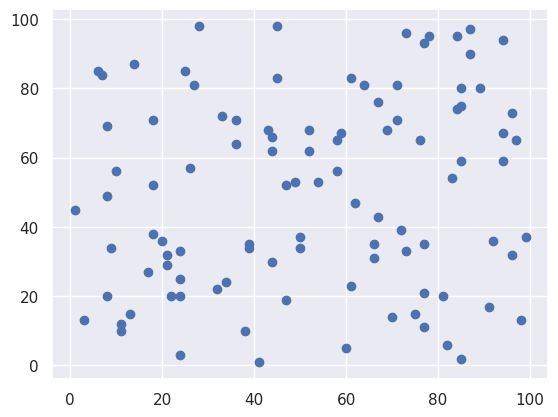

In [ ]:
#create a random set of datapoints
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set()

number_of_datapoints = 100
datapoints = np.random.randint(1,100,size=(number_of_datapoints,2))
#plto the points on scatter plot
plt.scatter(datapoints[:,0], datapoints[:,1])

Step 1 : Find a point with the lowest y coordniate value, if there are more than one, then select the one with the lower x coordinate value. Call this point an Anchor point

In [ ]:
anchor_point = datapoints[0]
for _, point in enumerate(datapoints):
    if point[1] < anchor_point[1]:
        anchor_point = point
    elif point[1] == anchor_point[1] and point[0] < anchor_point[0]:
        anchor_point = point
print(anchor_point)

[48  1]


Step 2: Sort all the points based on the angle they make with the anchor point. If two points make the same angle with Anchor Point P, then sort it by distance with P.

In [ ]:
from math import atan2

def polar_angle(p0, p1):
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return atan2(y_span,x_span)

# find the angle
datapoints_angles = []
origin = [0,0]
for _, point in enumerate(datapoints):
    datapoints_angles.append([point[0],point[1], polar_angle(anchor_point, point)])

datapoints_angles = np.array(datapoints_angles)
datapoints_angles = datapoints_angles[datapoints_angles[:,2].argsort()]
sorted_datapoints =  datapoints_angles[:,(0,1)]

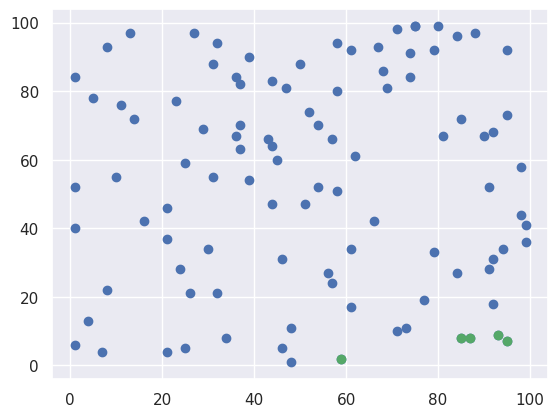

In [ ]:
plt.scatter(datapoints[:,0], datapoints[:,1])
plt.scatter(sorted_datapoints[0:5,0], sorted_datapoints[0:5,1], c='g')

step 3: initialize the convex hull with P and first element in the sorted array.

In [ ]:
convex_hull = [anchor_point, sorted_datapoints[0]]

step 4: iterate over each point in the sorted array and see if the sequence of two points make clockwise or counter clockwise direction. if clockwise then reject the point and move on to the next point. Continue this till you reach the anchor point.

In [ ]:
def ccw(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - (c[0] - a[0]) * (b[1] - a[1])

for point in sorted_datapoints[1:]:
    while ccw(convex_hull[-2],convex_hull[-1], point)<=0:
        del convex_hull[-1] # backtrack
    convex_hull.append(point)

Convex Hull Datapoints:
[48.  1.]
[59.  2.]
[95.  7.]
[99. 36.]
[99. 41.]
[98. 58.]
[95. 92.]
[88. 97.]
[80. 99.]
[75. 99.]
[13. 97.]
[ 8. 93.]
[ 1. 84.]
[1. 6.]
[7. 4.]
[48.  1.]


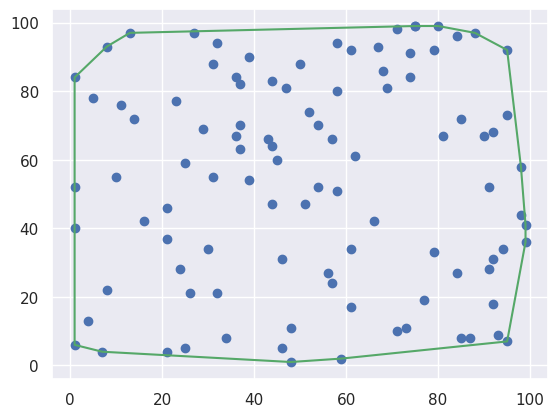

In [ ]:
convex_hull = np.array(convex_hull)
# Print the datapoints of the convex hull
print("Convex Hull Datapoints:")
for point in convex_hull:
    print(point)
plt.scatter(datapoints_angles[:,0], datapoints_angles[:,1])
plt.plot(convex_hull[:,0], convex_hull[:,1], c='g')

#Jarvis March

Iterations:
Iteration	Point		Convex Hull
Iteration 1: Point (2, 5), Convex Hull: [(1, 1)]
Iteration 2: Point (5, 5), Convex Hull: [(1, 1), (2, 5)]
Iteration 3: Point (5, 3), Convex Hull: [(1, 1), (2, 5), (5, 5)]
Iteration 4: Point (4, 1), Convex Hull: [(1, 1), (2, 5), (5, 5), (5, 3)]
Iteration 5: Point (1, 1), Convex Hull: [(1, 1), (2, 5), (5, 5), (5, 3), (4, 1)]


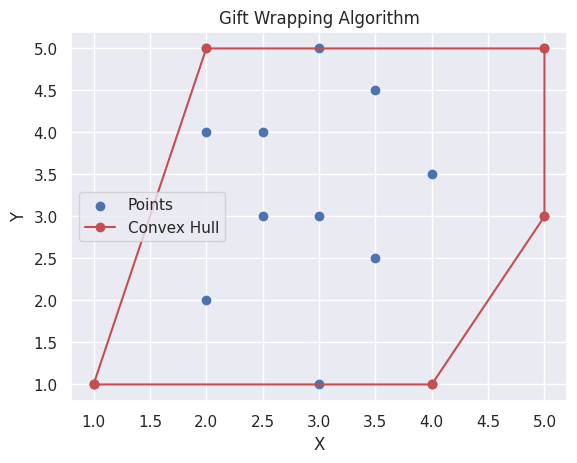

In [ ]:
import math
import matplotlib.pyplot as plt

def orientation(p1, p2, p3):
    x1, y1, x2, y2, x3, y3 = *p1, *p2, *p3
    d = (y3-y2)*(x2-x1) - (y2-y1)*(x3-x2)
    if d > 0:
        return 1
    elif d < 0:
        return -1
    else:
        return 0

def dist(p1, p2):
    x1, y1, x2, y2 = *p1, *p2
    return math.sqrt((y2-y1)**2 + (x2-x1)**2)

def gift_wrapping(points):
    on_hull = min(points)
    hull = []
    iterations = []  # For tracking the iterations
    iteration = 0

    while True:
        hull.append(on_hull)
        next_point = points[0]
        for point in points:
            o = orientation(on_hull, next_point, point)
            if next_point == on_hull or o == 1 or (o == 0 and dist(on_hull, point) > dist(on_hull, next_point)):
                next_point = point
        on_hull = next_point
        iterations.append((iteration + 1, next_point, hull.copy()))  # Save the current iteration
        if on_hull == hull[0]:
            break
        iteration += 1

    return hull, iterations

# Example points
points = [(1, 1), (2, 4), (5, 3), (4, 1), (2, 2), (3, 5), (3,3), (2,5), (3,1),(4,3.5), (3.5,2.5), (2.5,4), (3.5,4.5), (2.5,3), (5, 5)]

# Calculate the convex hull and iterations
convex_hull, iteration_history = gift_wrapping(points)

# Print the iteration table
print("Iterations:")
print("Iteration\tPoint\t\tConvex Hull")
for iteration, point, hull in iteration_history:
    print(f"Iteration {iteration}: Point {point}, Convex Hull: {hull}")

# Separate the x and y coordinates for plotting
x, y = zip(*points)
hull_x, hull_y = zip(*convex_hull)

# Plot the points and the convex hull
plt.scatter(x, y, marker='o', label='Points')
plt.plot(hull_x + (hull_x[0],), hull_y + (hull_y[0],), marker='o', linestyle='-', color='r', label='Convex Hull')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Gift Wrapping Algorithm')
plt.grid(True)
plt.show()


#Jarvis in World map

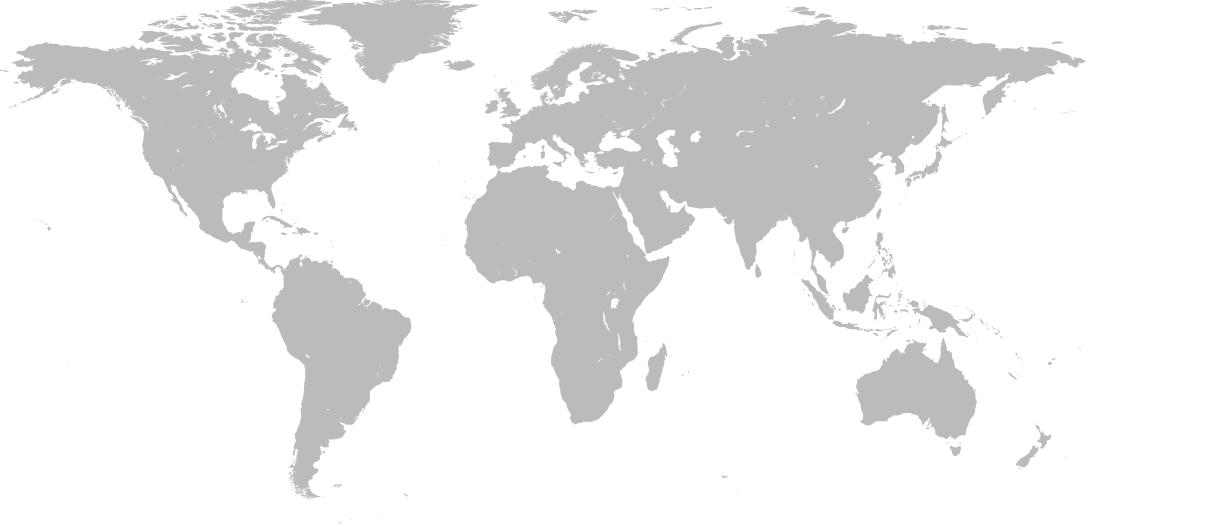

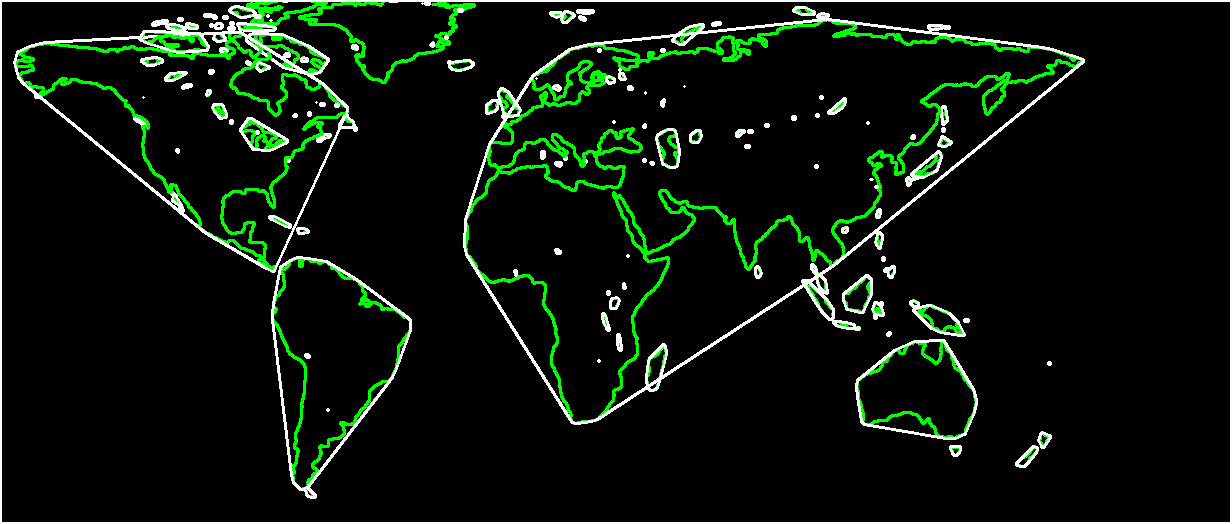

In [ ]:
import cv2
import numpy as np
import sys
from google.colab.patches import cv2_imshow

if __name__ == "__main__":
    if(len(sys.argv)) < 2:
        file_path = "/content/1scl.jpg"
    else:
        file_path = sys.argv[1]

    # read image
    src = cv2.imread("/content/1scl.jpg", 1)

    # show source image
    cv2_imshow(src)

    # convert image to gray scale
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    # blur the image
    blur = cv2.blur(gray, (3, 3))

    # binary thresholding of the image
    ret, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)

    # find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # create hull array for convexHull points
    hull = []

    # calculate points for each contour
    for i in range(len(contours)):
        hull.append(cv2.convexHull(contours[i], False))

    # create an empty black image
    drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

    # draw contours and hull points
    for i in range(len(contours)):
        color_contours = (0, 255, 0) # color for contours
        color = (255, 255, 255) # color for convex hull
        # draw contours
        cv2.drawContours(drawing, contours, i, color_contours, 2, 8, hierarchy)
        # draw convex hull
        cv2.drawContours(drawing, hull, i, color, 2, 8)

    cv2_imshow(drawing)

#Jarvis in Star

Number of contours detected: 1


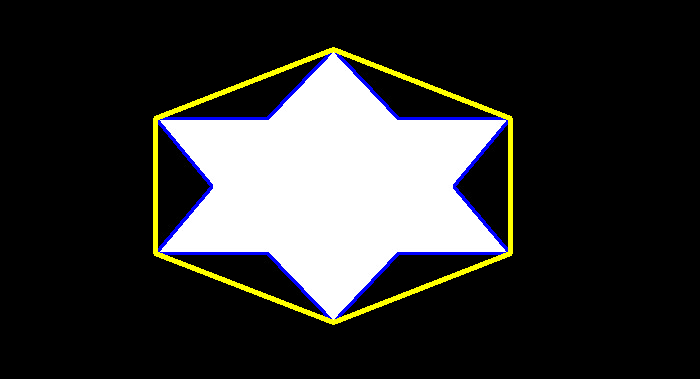

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# load the input image
img = cv2.imread('/content/2scl.jpg')

# convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding to convert grayscale to binary image
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:", len(contours))

# select the first contour
cnt = contours[0]

# find the convex hull using the contour
hull = cv2.convexHull(cnt)

# draw contour and convex hull on the input image
img = cv2.drawContours(img, [cnt], 0, (255, 0, 0), 2)
img = cv2.drawContours(img, [hull], 0, (0, 255, 255), 3)

# display the image with drawn contour and convex hull
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours detected: 3


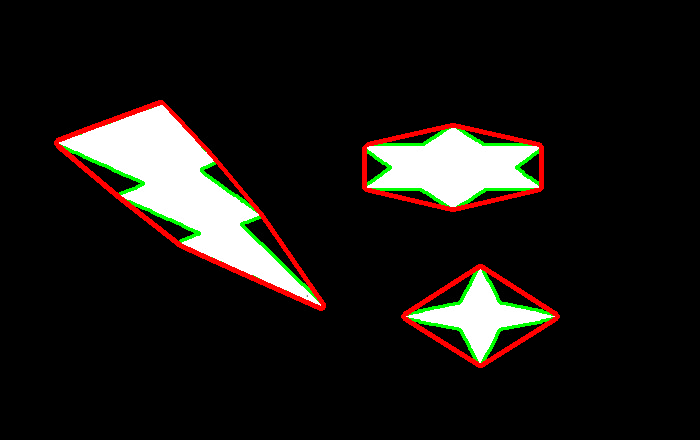

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/3scl.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,100,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:", len(contours))

# Find the convex hull for all the contours
for cnt in contours:
   hull = cv2.convexHull(cnt)
   img = cv2.drawContours(img,[cnt],0,(0,255,0),2)
   img = cv2.drawContours(img,[hull],0,(0,0,255),3)

# Display the image with convex hull drawn on it
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()